# Analyzing Baywheels Trip Data
## by JD Pritchett

## Investigation Overview

> The goal of this analysis is to identify trends in among users of a bike rental service in San Francisco.  The main factors considered in this project were the distance traveled, the duration of the trip, the start day and time, and the different types bikes and users that rented these bikes.

## Dataset Overview

> The original dataset consisted of 154,967 different user trips in July of 2020 and was trimmed to 75,921 different user trips after cleaning.   The start day and month variables were extracted from the original timestamp data and were converted to categorical variables.  The different types of bikes and users were two other categorical variables used.  The only two numeric variables analyzed were the duration and distance variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import geodesic

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe

df_clean = pd.read_csv('df_clean.csv')

In [4]:
#change start_hour and end_hour to categorical


cat_vars = ['start_hour', 'end_hour']

for var in cat_vars:
    df_clean[cat_vars] = df_clean[cat_vars].astype('category')
    
# change start_day, end_day, start_month, end_month, start_hour, end_hour into ordered categorical types

ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                    'start_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                    'end_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75921 entries, 0 to 75920
Data columns (total 20 columns):
Unnamed: 0          75921 non-null int64
ride_id             75921 non-null object
rideable_type       75921 non-null object
started_at          75921 non-null object
ended_at            75921 non-null object
start_station_id    75921 non-null float64
end_station_id      75921 non-null float64
start_lat           75921 non-null float64
start_lng           75921 non-null float64
end_lat             75921 non-null float64
end_lng             75921 non-null float64
member_casual       75921 non-null object
start_day           75921 non-null category
end_day             75921 non-null category
start_hour          75921 non-null category
end_hour            75921 non-null category
start_month         75921 non-null category
end_month           75921 non-null category
duration_sec        75921 non-null float64
distance            75921 non-null float64
dtypes: category(6), float64(8),

## Distribution of Start Day and Start Time

> Here we can see that most of the trips occurred between on Wednesdays, Thursdays, Fridays, or Saturdays, and most of the trips started between noon and 7 PM.

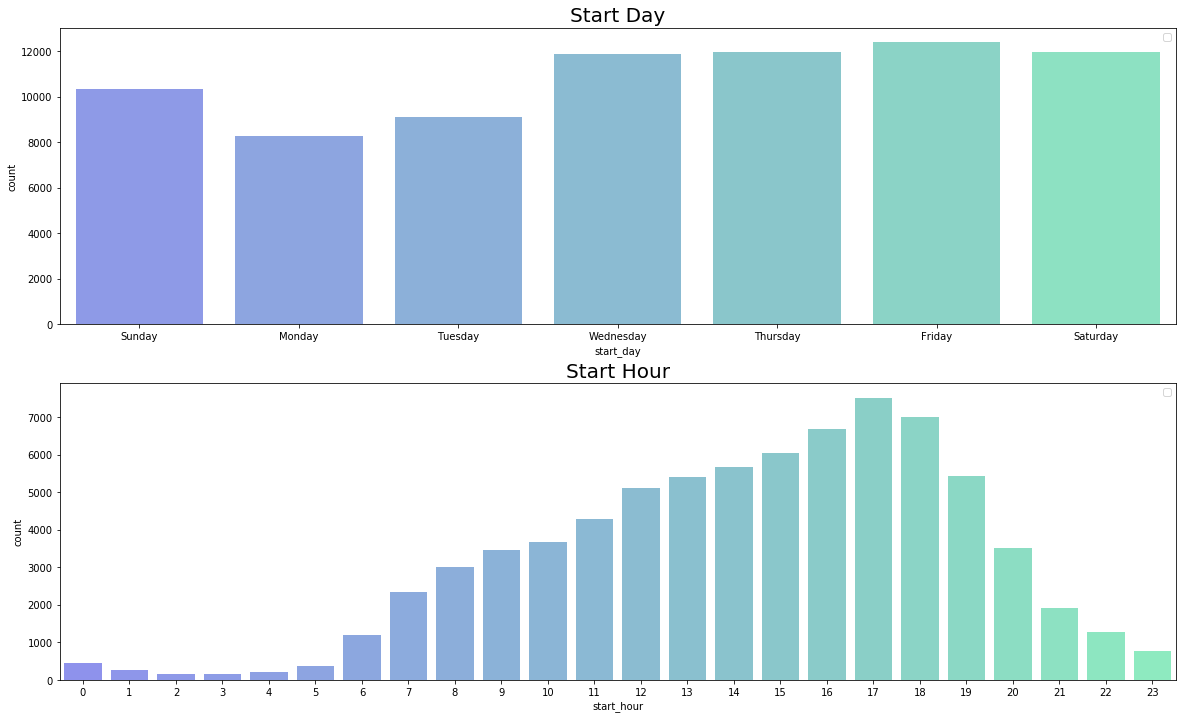

In [9]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

plt.figure(figsize = [20, 12]);

# subplot 1: start day
ax = plt.subplot(2, 1, 1);
sb.countplot(data = df_clean, x = 'start_day', palette = 'winter', alpha = .5)
ax.legend(loc = 0, ncol = 2); # re-arrange legend to remove overlapping
ax.set_title('Start Day', fontsize = 20);

# subplot 4: start hour
ax = plt.subplot(2, 1, 2);
sb.countplot(data = df_clean, x = 'start_hour', palette = 'winter', alpha = .5);
ax.legend(loc = 0, ncol = 3); # re-arrange legend to remove overlapping
ax.set_title('Start Hour', fontsize = 20);

plt.show();

## Correlation Between Distance and Duration

> You might think that the longer people ride their bikes, the further they go, but the data told a different story.  While these two variables were positively correlated, their correlation was a weak one as seen below.  

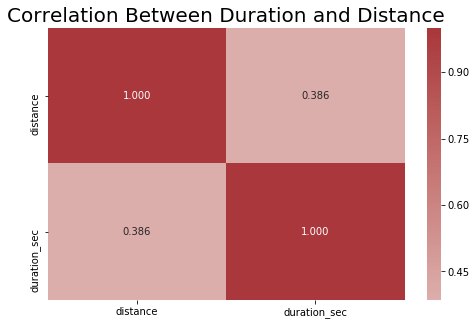

In [11]:
numeric_vars = ['distance', 'duration_sec']
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.title('Correlation Between Duration and Distance', fontsize = 20)
plt.show()

## Hourly Usage During Weekdays for Customers and Subscribers

> Here we take a deeper look at the difference between when casual users and subscribers start their trips. We can see that casual users started their ride around 2 PM on Saturdays the most, and members started their rides around 5-6 PM on Wednesdays the most. 

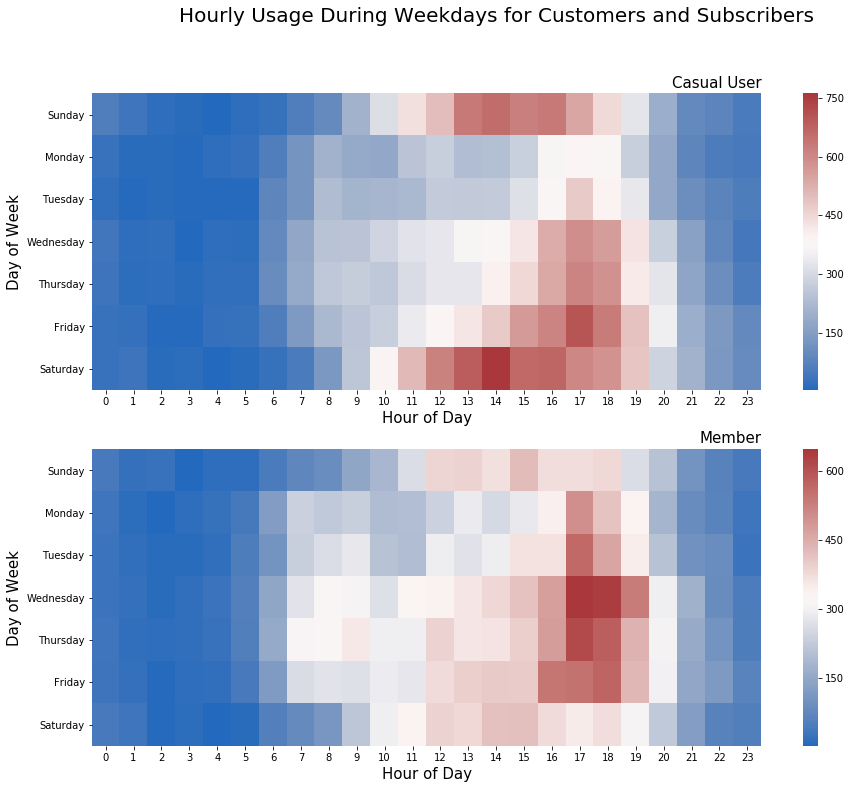

In [12]:

plt.figure(figsize = [15,12])

plt.suptitle('Hourly Usage During Weekdays for Customers and Subscribers', fontsize = 20)

plt.subplot(2, 1, 1)
customers = df_clean.query('member_casual == "casual"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='vlag');
plt.title('Casual User', loc='right', fontsize = 15);
plt.xlabel('Hour of Day', fontsize = 15);
plt.ylabel('Day of Week', fontsize = 15);

plt.subplot(2, 1, 2)
subscribers = df_clean.query('member_casual == "member"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='vlag');
plt.title('Member', loc='right', fontsize = 15);
plt.xlabel('Hour of Day', fontsize = 15);
plt.ylabel('Day of Week', fontsize = 15);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!